# Standard Test Cases

To facilitate testing, we have provided a suite of canonical examples that cover the basic, simple scenarios that can occur in segmentation and tracking. Here we describe them and show visualizations of each case.

Matchers should test all the segmentation cases. Metrics should test all the tracking cases. The examples are generated by functions in the `tests/examples/` directory.

In [23]:
%load_ext autoreload
%autoreload 2

import sys

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.patches import Patch

from traccuracy._tracking_graph import TrackingGraph

sys.path.append("../tests")

import examples.graphs as ex_graphs
import examples.segs as ex_segs

In [61]:
def get_loc(graph, node):
    return graph.graph.nodes[node]["t"], graph.graph.nodes[node]["y"]


def plot_graph(ax, graph: TrackingGraph, color="black"):
    if graph.graph.number_of_nodes() == 0:
        return [0, 0], [0, 0]
    ids = list(graph.graph.nodes)
    x = [graph.graph.nodes[node]["t"] for node in ids]
    y = [graph.graph.nodes[node]["y"] for node in ids]
    ax.scatter(x, y, color=color)
    for _x, _y, _id in zip(x, y, ids):
        ax.text(_x + 0.05, _y + 0.05, str(_id))

    for u, v in graph.graph.edges():
        xs = [graph.graph.nodes[u]["t"], graph.graph.nodes[v]["t"]]
        ys = [graph.graph.nodes[u]["y"], graph.graph.nodes[v]["y"]]
        ax.plot(xs, ys, color=color)

    return [max(x), min(x)], [max(y), min(y)]


def plot_matching(ax, matched, color="grey"):
    for u, v in matched.mapping:
        xs = [
            matched.gt_graph.graph.nodes[u]["t"],
            matched.pred_graph.graph.nodes[v]["t"],
        ]
        ys = [
            matched.gt_graph.graph.nodes[u]["y"],
            matched.pred_graph.graph.nodes[v]["y"],
        ]
        ax.plot(xs, ys, color=color, linestyle="dashed")


def plot_matched(examples, title):
    gt_color = "black"
    pred_color = "blue"
    mapping_color = "grey"
    fig, ax = plt.subplots(1, len(examples) + 1, figsize=(3 * len(examples) + 1, 2))
    for i, matched in enumerate(examples):
        axis = ax[i]
        xbounds, ybounds = plot_graph(axis, matched.gt_graph, color=gt_color)
        bounds = plot_graph(axis, matched.pred_graph, color=pred_color)
        xbounds.extend(bounds[0])
        ybounds.extend(bounds[1])
        plot_matching(axis, matched, color=mapping_color)
        axis.set_ybound(min(ybounds) - 0.5, max(ybounds) + 0.5)
        axis.set_xbound(min(xbounds) - 0.5, max(xbounds) + 0.5)
        axis.set_ylabel("Y Value")
        axis.set_xlabel("Time")

    handles = [
        Patch(color=gt_color),
        Patch(color=pred_color),
        Patch(color=mapping_color),
    ]
    labels = ["Ground Truth", "Prediction", "Mapping"]
    ax[-1].legend(handles=handles, labels=labels, loc="center")
    ax[-1].set_axis_off()
    plt.tight_layout()
    fig.suptitle(title, y=1.05)

## Graph Cases

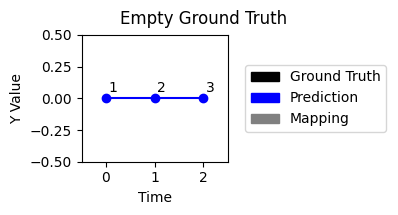

In [62]:
plot_matched([ex_graphs.empty_gt()], "Empty Ground Truth")

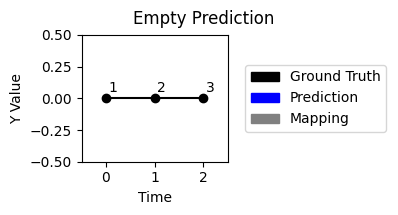

In [63]:
plot_matched([ex_graphs.empty_pred()], "Empty Prediction")

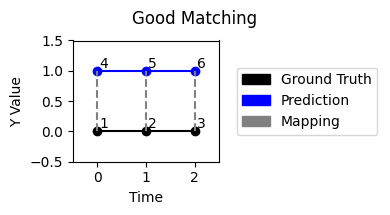

In [64]:
plot_matched([ex_graphs.good_matched()], "Good Matching")

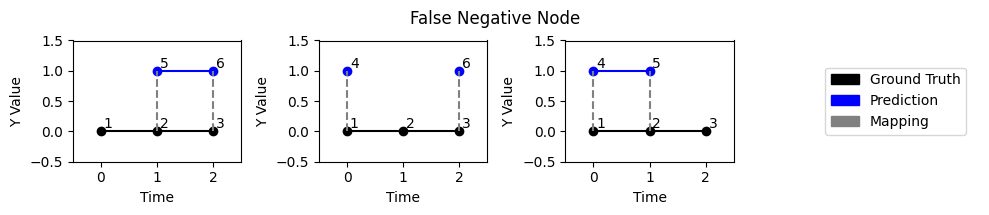

In [65]:
plot_matched([ex_graphs.fn_node_matched(t) for t in [0, 1, 2]], "False Negative Node")

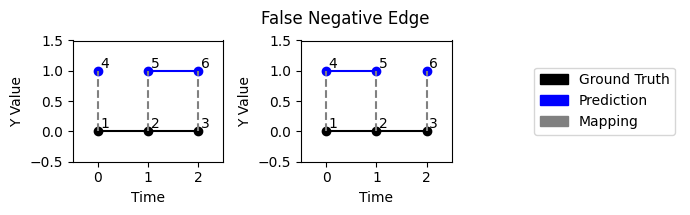

In [66]:
plot_matched([ex_graphs.fn_edge_matched(t) for t in [0, 1]], "False Negative Edge")

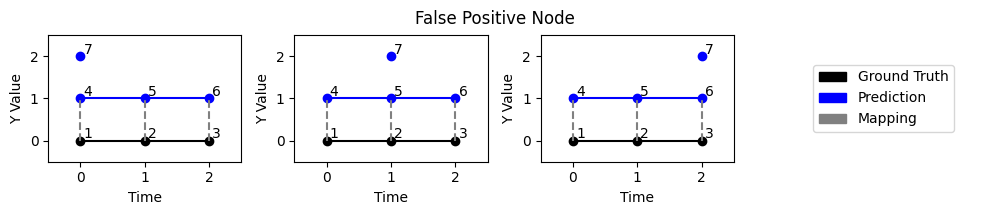

In [67]:
plot_matched([ex_graphs.fp_node_matched(t) for t in [0, 1, 2]], "False Positive Node")

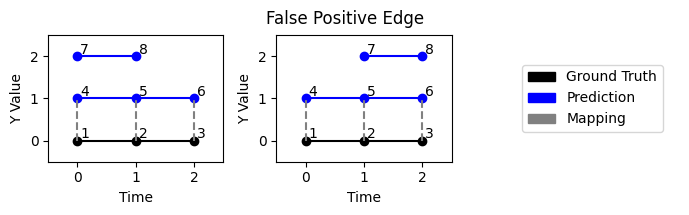

In [68]:
plot_matched([ex_graphs.fp_edge_matched(t) for t in [0, 1]], "False Positive Edge")

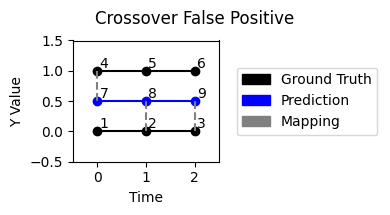

In [69]:
plot_matched([ex_graphs.crossover_edge()], "Crossover False Positive")

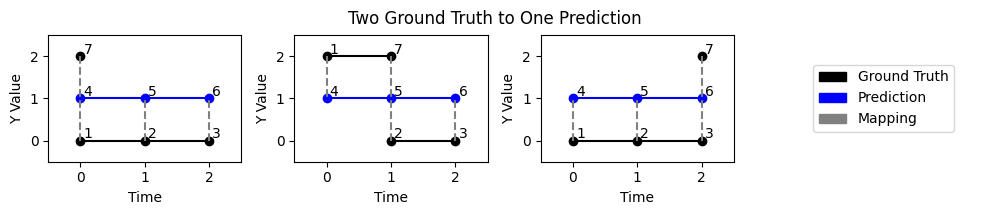

In [ ]:
plot_matched(
    [ex_graphs.node_two_to_one(t) for t in [0, 1, 2]],
    "Two Ground Truth to One Prediction"
)

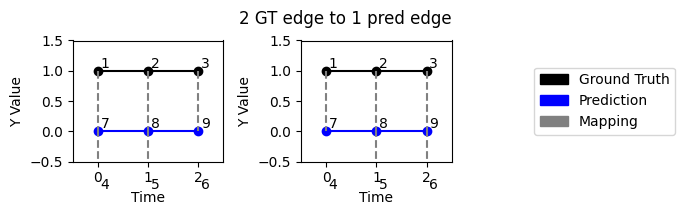

In [ ]:
plot_matched(
    [ex_graphs.edge_two_to_one(t) for t in [0, 1]],
    "2 GT edge to 1 pred edge"
)

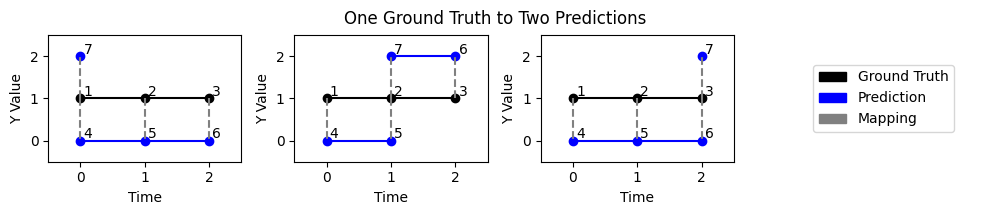

In [ ]:
plot_matched(
    [ex_graphs.node_one_to_two(t) for t in [0, 1, 2]],
    "One Ground Truth to Two Predictions"
)

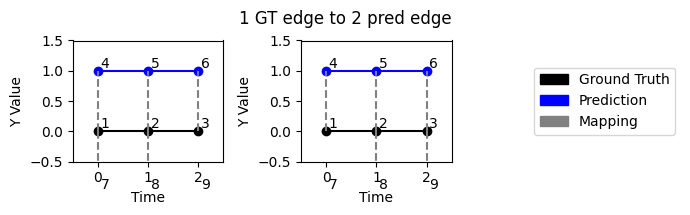

In [ ]:
plot_matched(
    [ex_graphs.edge_one_to_two(t) for t in [0, 1]],
    "1 GT edge to 2 pred edge"
)

## Division Cases

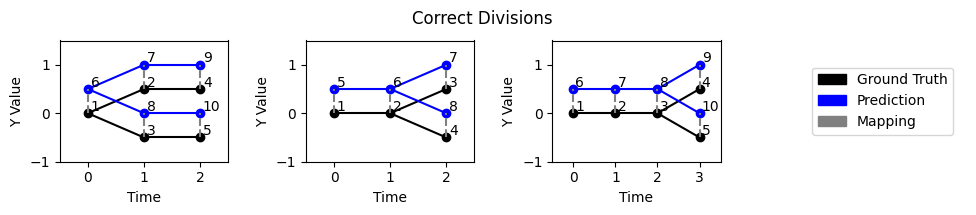

In [12]:
plot_matched([ex_graphs.good_div(t) for t in [0, 1, 2]], 'Correct Divisions')

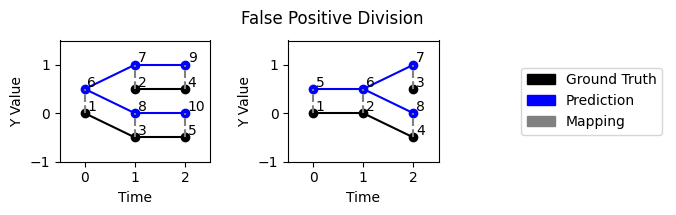

In [13]:
plot_matched([ex_graphs.fp_div(t) for t in [0, 1]], 'False Positive Division')

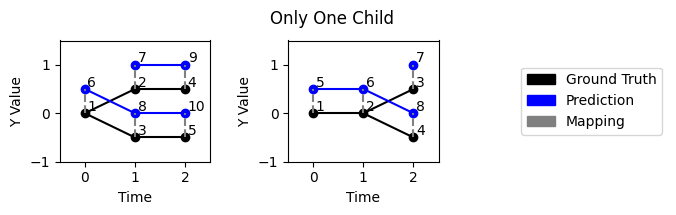

In [14]:
plot_matched([ex_graphs.one_child(t) for t in [0, 1]], 'Only One Child')

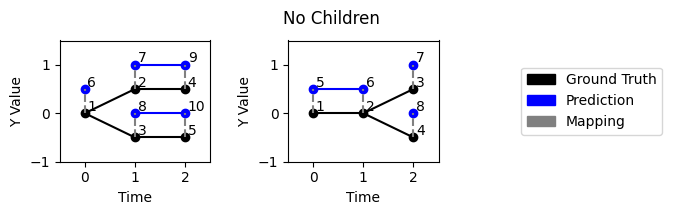

In [15]:
plot_matched([ex_graphs.no_children(t) for t in [0, 1]], 'No Children')

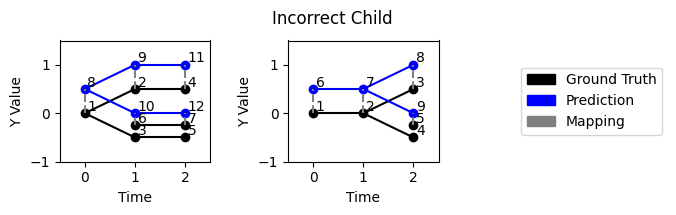

In [16]:
plot_matched([ex_graphs.wrong_child(t) for t in [0, 1]], 'Incorrect Child')

## Shifted Division Cases

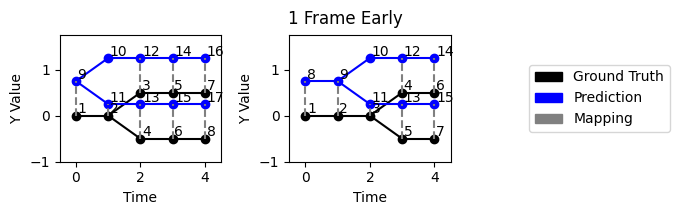

In [17]:
plot_matched([ex_graphs.div_1early_end(), ex_graphs.div_1early_mid()], '1 Frame Early')

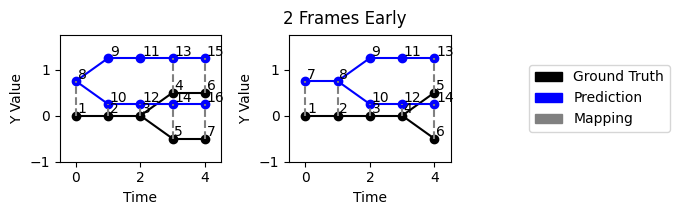

In [18]:
plot_matched([ex_graphs.div_2early_end(), ex_graphs.div_2early_mid()], '2 Frames Early')

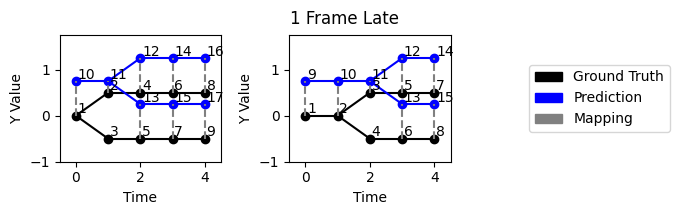

In [19]:
plot_matched([ex_graphs.div_1late_end(), ex_graphs.div_1late_mid()], '1 Frame Late')

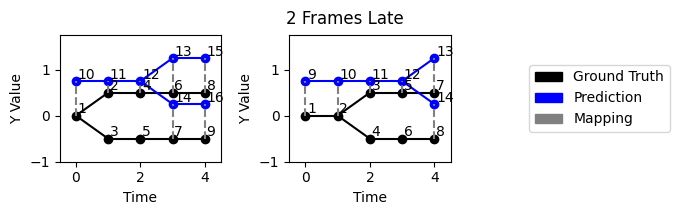

In [20]:
plot_matched([ex_graphs.div_2late_end(), ex_graphs.div_2late_mid()], '2 Frames Late')

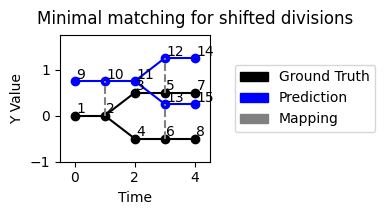

In [42]:
plot_matched([ex_graphs.div_shift_min_match()], "Minimal matching for shifted divisions")

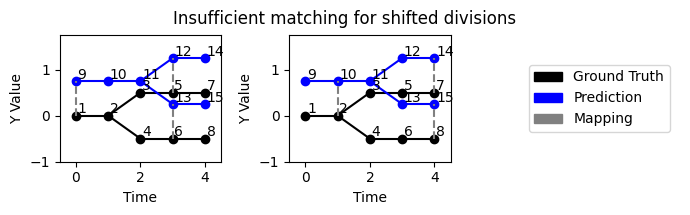

In [ ]:
plot_matched(
    [ex_graphs.div_shift_bad_match_pred(), ex_graphs.div_shift_bad_match_daughter()],
    "Insufficient matching for shifted divisions"
)

## Segmentation Cases

In [74]:
def plot_pair(gt, pred, title):
    max_label = np.max([gt, pred])
    colors = ["black", "red", "blue", "green", "yellow"]
    colormap = ListedColormap(colors)
    fig, ax = plt.subplots(1, 2, figsize=(6, 4))
    ax[0].imshow(gt, cmap=colormap, vmax=5)
    ax[0].set_title("Ground Truth")
    # ax[0].set_axis_off()
    ax[1].imshow(pred, cmap=colormap, vmax=5)
    ax[1].set_title("Predicted")

    handles = [Patch(color=colors[i]) for i in range(1, max_label + 1)]
    labels = [str(i) for i in range(1, max_label + 1)]
    ax[1].legend(handles=handles, labels=labels, title="Label IDs", loc="upper right")
    fig.suptitle(title, y=0.9)
    fig.tight_layout()

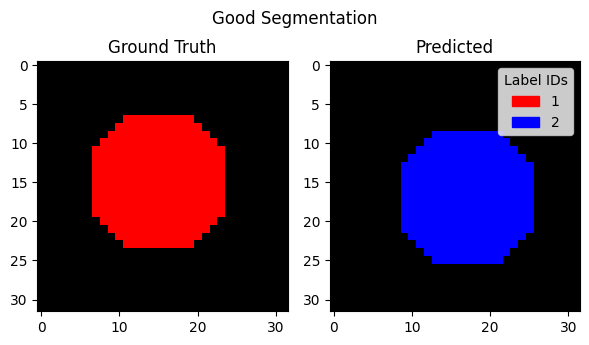

In [75]:
plot_pair(*ex_segs.good_segmentation_2d(), "Good Segmentation")

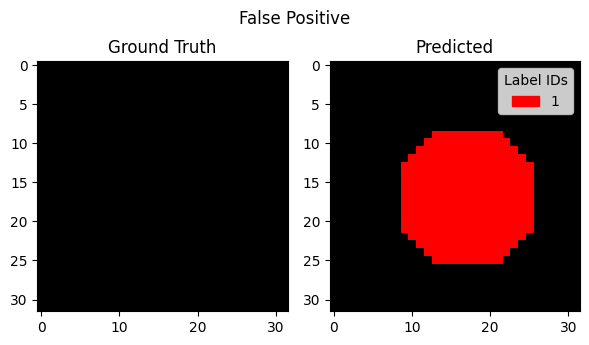

In [76]:
plot_pair(*ex_segs.false_positive_segmentation_2d(), "False Positive")

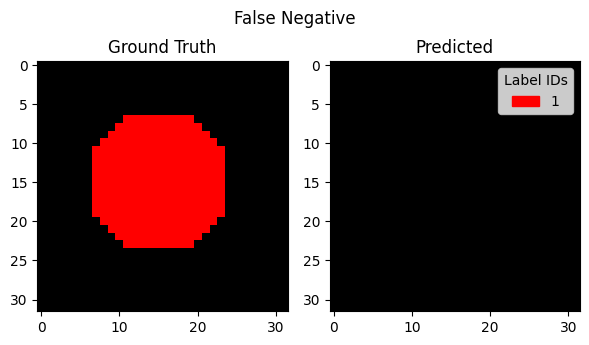

In [77]:
plot_pair(*ex_segs.false_negative_segmentation_2d(), "False Negative")

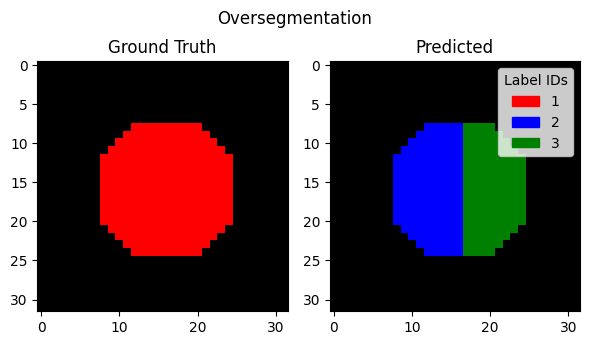

In [78]:
plot_pair(*ex_segs.oversegmentation_2d(), "Oversegmentation")

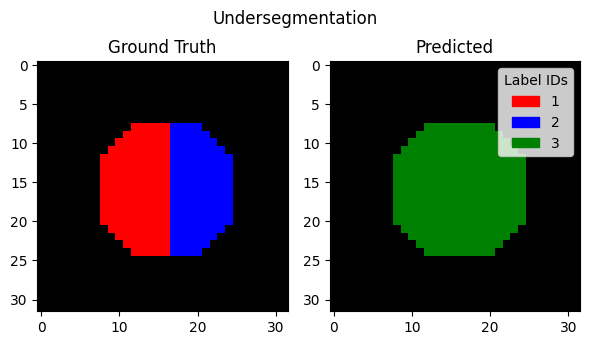

In [79]:
plot_pair(*ex_segs.undersegmentation_2d(), "Undersegmentation")

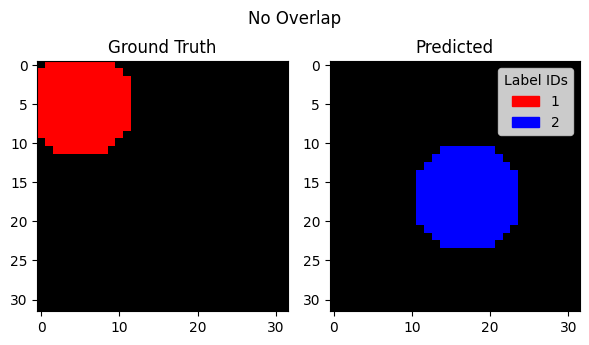

In [80]:
plot_pair(*ex_segs.no_overlap_2d(), "No Overlap")

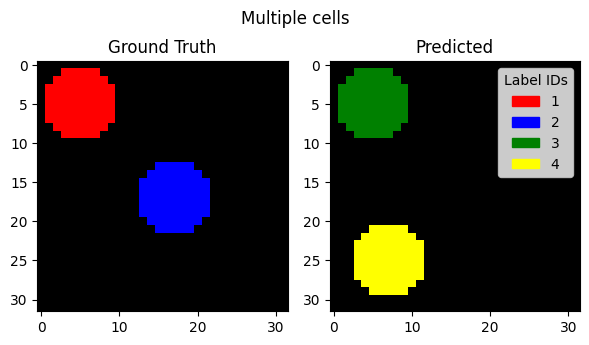

In [81]:
plot_pair(*ex_segs.multicell_2d(), "Multiple cells")